In [2]:
# Check tenserflow version
import tensorflow as tf
tf.__version__

'2.15.0'

In [5]:
# Take simple dataset
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data["data"], data["target"]

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# standardization for uniform (symmetric learning) and fast convergence
std = StandardScaler()
X = std.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=.3, stratify=y
)

In [52]:
# (m, n) - (row, column)
m, n = X.shape

In [98]:
# building simple tf model for classification problem
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(n, )),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [99]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics="accuracy",
)

In [100]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    callbacks=[callback]
)

Epoch 1/200
13/13 [==============================] - 1s 21ms/step - loss: 0.3765 - accuracy: 0.8945 - val_loss: 0.3428 - val_accuracy: 0.9064
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.3389 - accuracy: 0.9146 - val_loss: 0.3121 - val_accuracy: 0.9240
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.3088 - accuracy: 0.9221 - val_loss: 0.2876 - val_accuracy: 0.9240
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2854 - accuracy: 0.9322 - val_loss: 0.2673 - val_accuracy: 0.9298
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.2656 - accuracy: 0.9372 - val_loss: 0.2510 - val_accuracy: 0.9298
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.2495 - accuracy: 0.9447 - val_loss: 0.2373 - val_accuracy: 0.9298
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 0.2360 - accuracy: 0.9472 - val_loss: 0.2259 - val_accuracy: 0.9357
Epoch 8/200


In [101]:
model.evaluate(X_train, y_train), model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.0847 - accuracy: 0.9708


([0.0588446706533432, 0.9924623370170593],
 [0.08469224721193314, 0.9707602262496948])

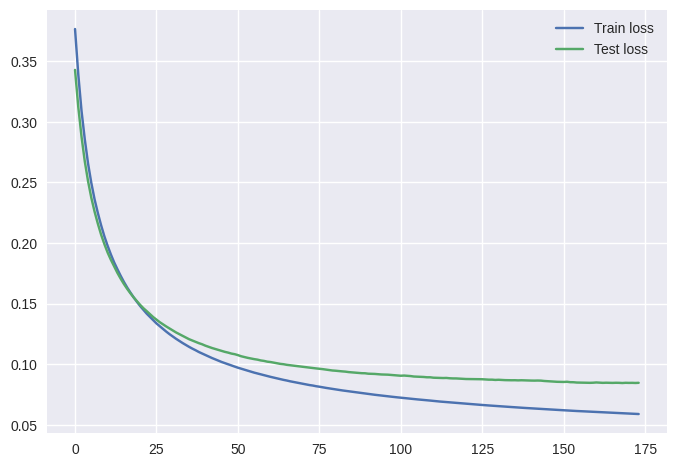

In [102]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Test loss");
plt.legend();